In this notebook we do basic exploratory analysis of a dataset. This may give us some insights for approaches to take when using the data later.

In [1]:
from functions import *

%matplotlib inline

Define the necessary parameters

In [2]:
activityFile = '../Data (Algebra 1)/YearUsageActivity.csv'
surveyFile = '../Data (Algebra 1)/YearSurvey.csv'

First, we will load the data. This has been compiled and formatted by Stephen.

In [3]:
activitydf = readData(activityFile)
surveydf = readData(surveyFile)

We then only consider students who have completed surveys

In [4]:
userdf = filterByIndex(activitydf,surveydf.index)

Here is the list of the features we are considering.

In [5]:
columnLabels = getColumnLabels(userdf)

|Attribute         |Description                                                      |Type             |
|:---              |:---                                                             |:---             |     
|desktop           |Fraction of time spent on desktop                                |Numeric, ratio   |
|spring            |Fraction of sessions in Spring semester                          |Numeric, ratio   |
|hour              |Mean time of day for activity                                    |Numeric, interval|
|sessionTime       |Mean length of sessions in minutes                               |Numeric, ratio   |
|NumSessions       |Number of total sessions                                         |Numeric, ratio   |

In order to consider outliers, we will plot the cumulative distribution for the number of sessions, average session length, and hour of day.

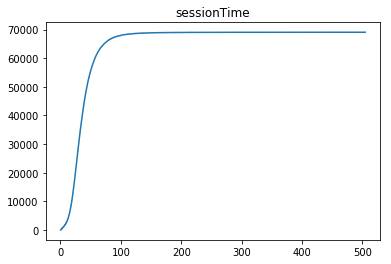

In [6]:
plotCDF('sessionTime', userdf)

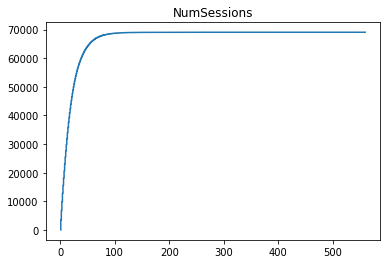

In [7]:
plotCDF('NumSessions', userdf)

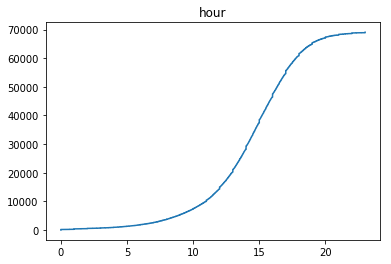

In [8]:
plotCDF('hour', userdf)

It looks like we probably don't have to replace the values for the average hour of day, but we will replace for session time and number of sessions.

Next, we replace any values above this cutoff with the 99th percentile value.

In [9]:
userdf1 = replaceDataFrameOutliers(userdf,['sessionTime','NumSessions'])

c:\program files (x86)\python36-32\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


We will then get the basic statistical descriptions of each attribute

In [10]:
summaryStats(userdf1)

69097 samples


,desktop,spring,hour,sessionTime,NumSessions
mean,0.84,0.71,14.26,36.54,19.18
std,0.24,0.31,3.49,19.84,17.76
min,0.00,0.00,0.00,0.50,1.00
25%,0.73,0.51,12.50,23.23,6.00
50%,1.00,0.79,14.64,32.65,14.00
75%,1.00,1.00,16.57,45.50,26.00
max,1.00,1.00,23.00,111.46,87.00


Some interesting notes:
- vast majority of students exclusively use desktop computer
- activity is skewed towards Spring
- very little activity in the morning
- most sessions are shorter than a half hour
- most studets log in for very few sessions

For a more visual representation, we will look at the box plot of each attribute.

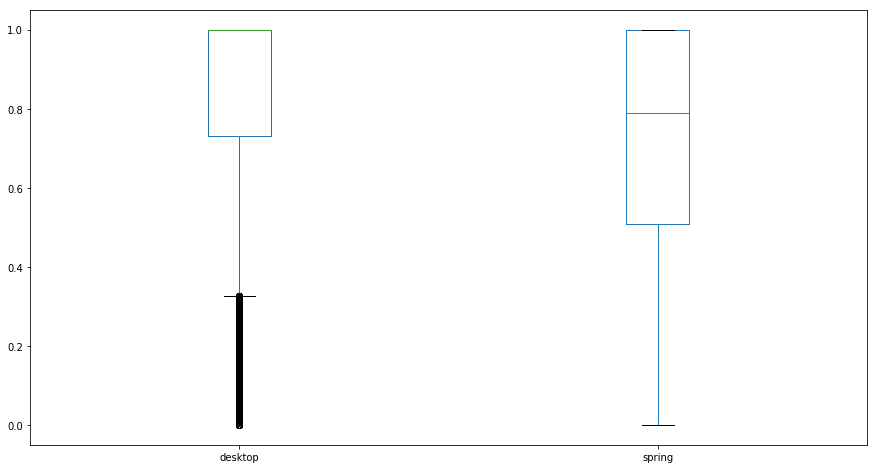

In [11]:
makeBoxplots(userdf1,['desktop', 'spring'],True)

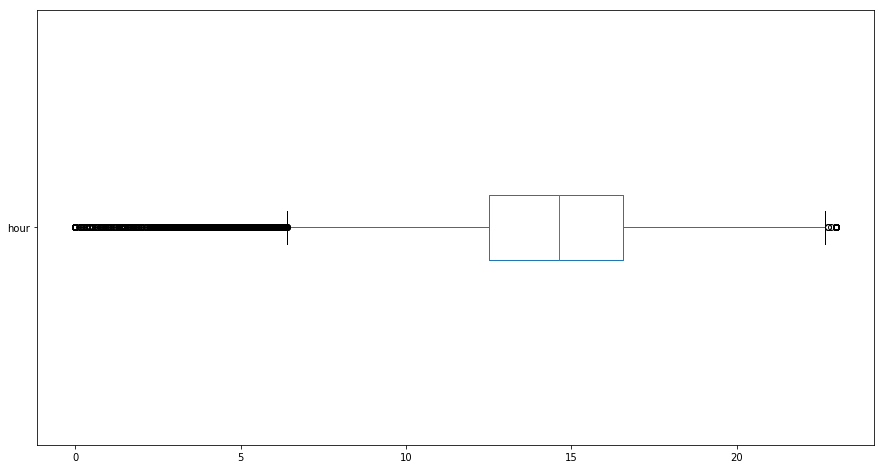

In [12]:
makeBoxplots(userdf1,['hour'],False)

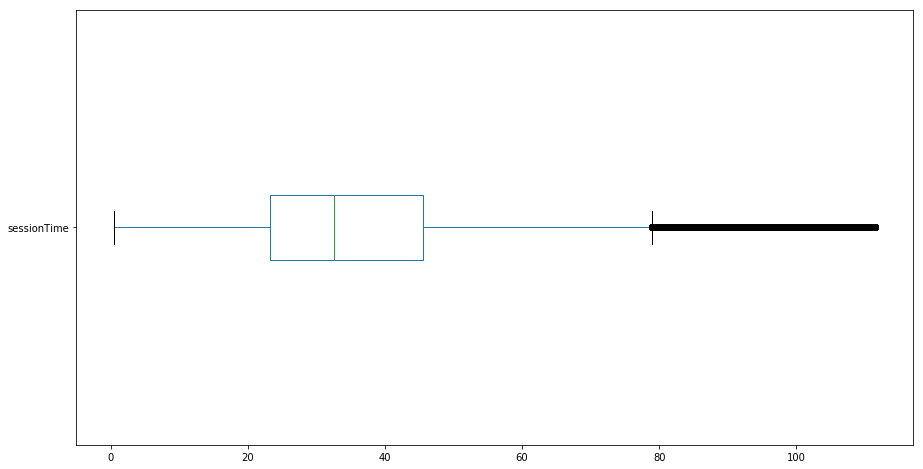

In [13]:
makeBoxplots(userdf1,['sessionTime'],False)

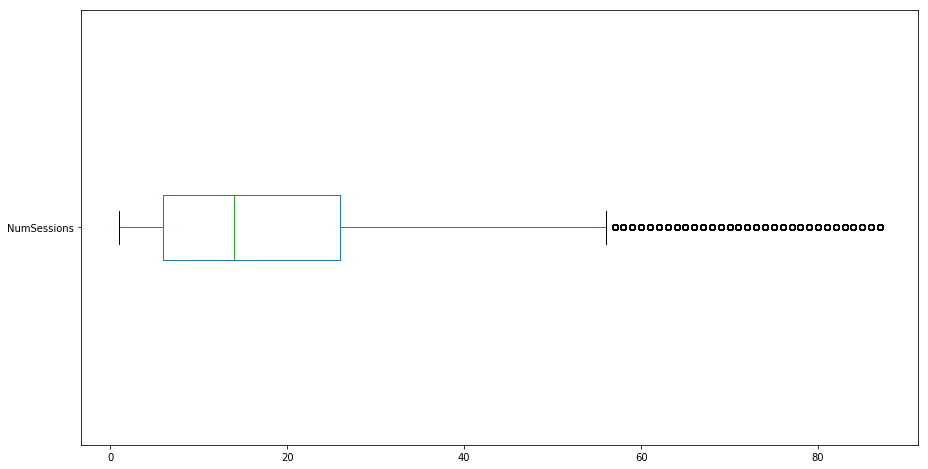

In [14]:
makeBoxplots(userdf1,['NumSessions'],False)

These are also highly skewed with many outliers, but do not have a zero median.

Instead of boxplots, we can consider using a histogram to better visualize the distribution of each attribute.

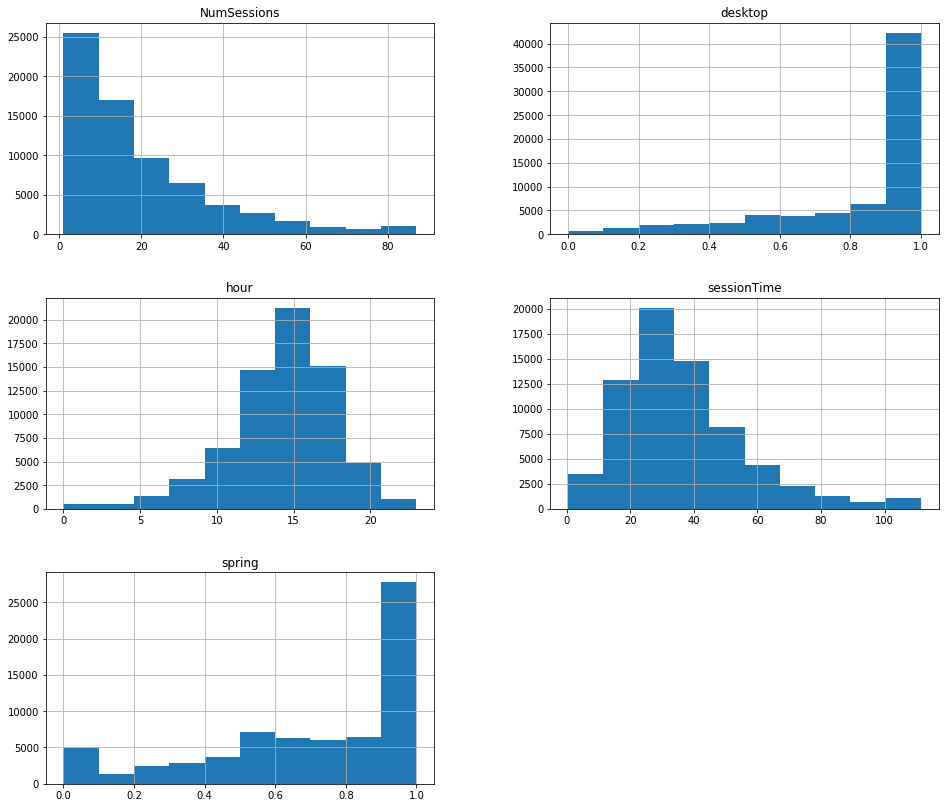

In [15]:
makeHistograms(userdf1)

We will now scale all of the features to $[0,1]$ so the magnitudes are comparable

In [20]:
userdf2, scalers = scaleDataframe(userdf1)

C:\Users\emje6419\Dropbox (Personal)\VLL\Code\functions.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[columnName] = np.reshape(scaler.fit_transform(data),len(data))


In [21]:
summaryStats(userdf2)

69097 samples


,desktop,spring,hour,sessionTime,NumSessions
mean,0.84,0.71,0.62,0.32,0.21
std,0.24,0.31,0.15,0.18,0.21
min,0.00,0.00,0.00,0.00,0.00
25%,0.73,0.51,0.54,0.20,0.06
50%,1.00,0.79,0.64,0.29,0.15
75%,1.00,1.00,0.72,0.41,0.29
max,1.00,1.00,1.00,1.00,1.00


In the next part, we will use some data visualization techniques. To investigate potential correlation between different attributes, we will use a scatterplot matrix to compare pairwise-correlation.

In order to aid visualization, we will randomly choose 1000 samples to plot.

In [22]:
few_users = getSample(userdf2, 1000)

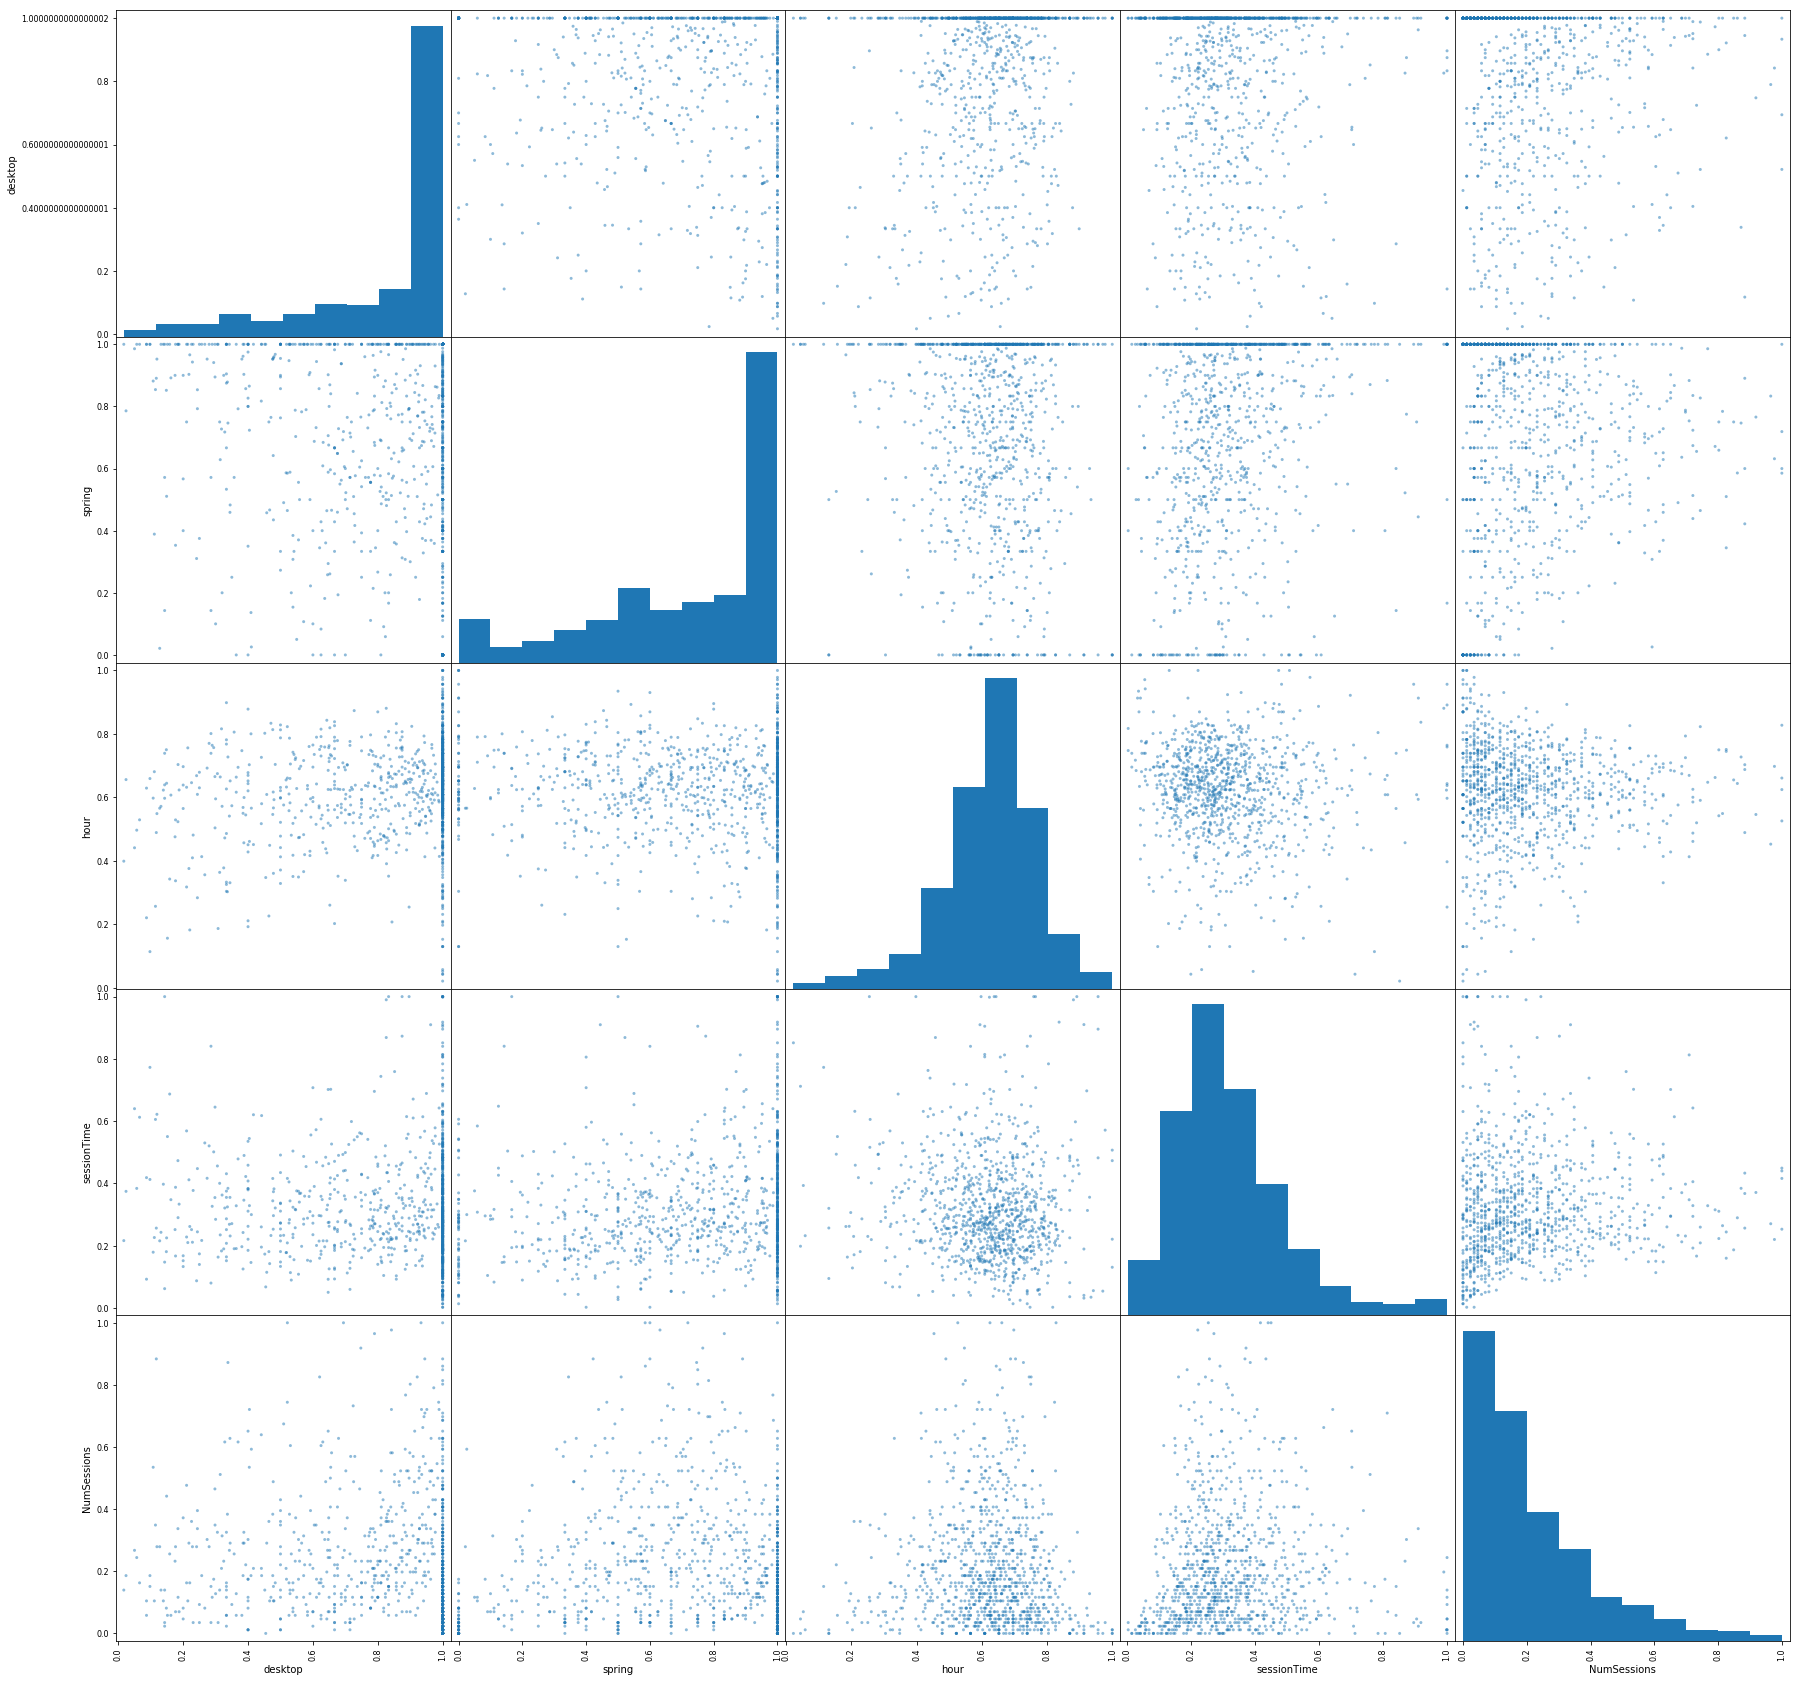

In [23]:
makeScatterMatrix(few_users)

We can see that there are no strong trends between the attributes. 

Lastly, we will compute the distance matrix. We will use the Euclidean distance metric for convenience since there are no obvious reasons to use Manhattan distance or cosine distance. We will use the small sample of data samples to speed up computation.

In [24]:
dist_df = calculateDistances(few_users)

In [25]:
summaryStats(dist_df)

499500 samples


,Distance
mean,0.64
std,0.26
min,0.00
25%,0.44
50%,0.62
75%,0.83
max,1.74


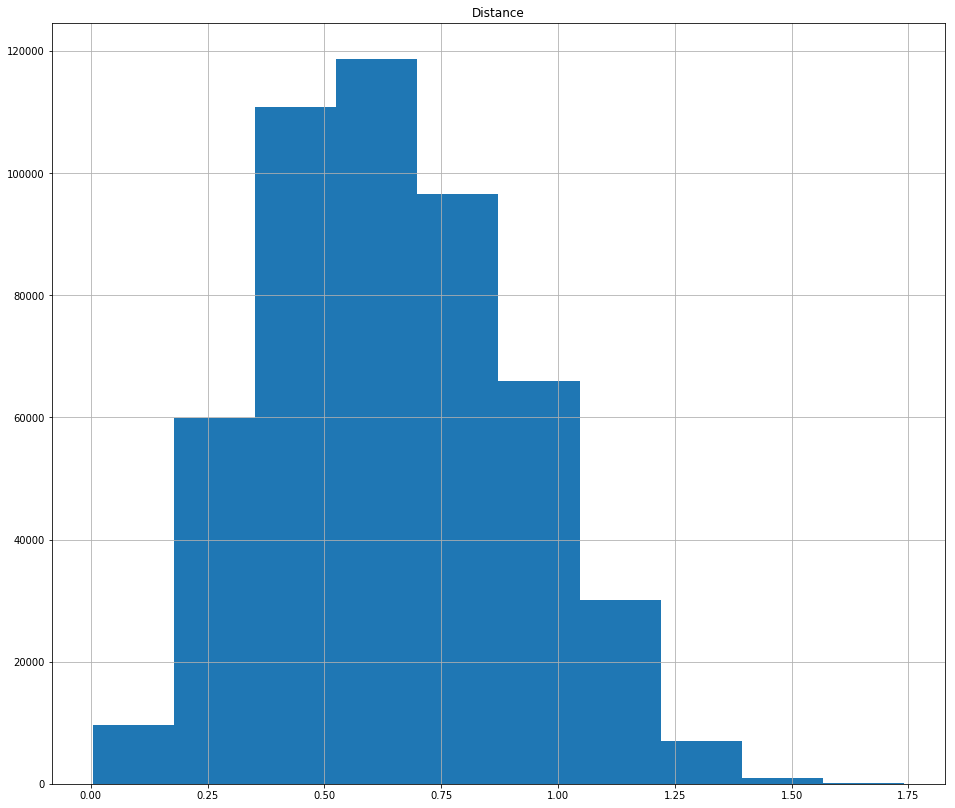

In [26]:
makeHistograms(dist_df)

We can see the distances are actually not heavily skewed but also do not have a large spread.